<a href="https://colab.research.google.com/github/enidroman/Data-620-Web-Analysis/blob/main/Data_620_Final_Project_NLP_Sentiment_and_Social_Network_Analysis_for_2020_US_Election_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **NLP Sentiment and Social Network Analysis for 2020 US Election Tweets**

 Author: Enid Roman

### **Initial Phase**

#### **Context**

For my final project I will discuss the prediction of the 2020 US election results based on Sentiment Analysis using tweets. Sentiment Analysis is a powerful technique with significant business implications such as predicting election results. We can forecast the outcome of the U.S. election by examining the sentiment behind the significant number of tweets by the general public toward participating candidates in the 2020 U.S. election.

While searching and researching for an interesting Natural Language Processing Project for my final project, I came across the 2020 Election Tweets in Kaggle’s website. In reading the two documents that were attached, https://arxiv.org/abs/1706.02271 and https://dl.acm.org/doi/fullHtml/10.1145/3339909, I got more interested using the datasets for my final project and seeing the results. Since we are again in 2024 approaching Presidential Election, I did try looking for a 2024 US Election Tweets dataset but was not successful in finding one.


#### **Data Background**

The two datasets, hashtag_joebiden.csv and hashtag_donaldtrump.csv, were otained from https://www.kaggle.com/datasets/manchunhui/us-election-2020-tweets/data. The data used is tweets that were collected using the Twitter API statuses lookup and sns scrape with #DonaldTrump and #JoeBiden used as keywords. The tweets were collected from 10/15/2020 to 08/11/2020. I will explore information such as the distribution of tweets by state and source; the sentiment of tweets for each candidate (negative, neutral, or positive); and the overall sentiment of tweets.

#### **Objectives:**

1. How do subjectivity scores for each candidate vary across states and who was mentioned in more subjective tweets?

2. How does sentiment of Twitter messages base on state location correlate with the real-world sentiment of the public towards the two candidates?

3. Which sentiment holds the most value and how it will affect the election results?

4. Which community leaders from the social network are the most important nodes in this network?


### **Data Preparation**

#### **Install Libraries**

In [ ]:
!pip install nltk
!pip install wordcloud
!pip install textblob
!pip install textblob pandas plotly
!pip install networkx
!pip install --upgrade networkx

# Import the nltk module
import nltk

# Download NLTK resources
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from tabulate import tabulate

# Libraries for Sentiment Analysis
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from wordcloud import WordCloud

import networkx as nx

# to avoid warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### **Data Acquistion**

#### **Importing Both Dataset**

#### **Donald Trump Data**

In [ ]:
# Load the first dataset hashtag_donaldtrump.csv and read first three lines.

trump = pd.read_csv("https://media.githubusercontent.com/media/enidroman/Data-620-Web-Analysis/main/hashtag_donaldtrump.csv", lineterminator='\n')
print(trump.head(2))

            created_at      tweet_id  \
0  2020-10-15 00:00:01  1.316529e+18   
1  2020-10-15 00:00:01  1.316529e+18   

                                               tweet  likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...    0.0            0.0   
1  Usa 2020, Trump contro Facebook e Twitter: cop...   26.0            9.0   

             source      user_id           user_name user_screen_name  \
0         TweetDeck  360666534.0  El Sol Latino News  elsollatinonews   
1  Social Mediaset   331617619.0             Tgcom24  MediasetTgcom24   

                                    user_description  ...  \
0  🌐 Noticias de interés para latinos de la costa...  ...   
1  Profilo ufficiale di Tgcom24: tutte le notizie...  ...   

  user_followers_count                 user_location       lat      long  \
0               1860.0  Philadelphia, PA / Miami, FL  25.77427 -80.19366   
1            1067661.0                           NaN       NaN       NaN   

   city    

#### **Joe Biden Data**

In [ ]:
# Load the first dataset hashtag_joebiden.csv and read first three lines.

biden = pd.read_csv("https://media.githubusercontent.com/media/enidroman/Data-620-Web-Analysis/main/hashtag_joebiden.csv", lineterminator='\n')
print(biden.head(2))

            created_at      tweet_id  \
0  2020-10-15 00:00:01  1.316529e+18   
1  2020-10-15 00:00:18  1.316529e+18   

                                               tweet  likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...    0.0            0.0   
1  #HunterBiden #HunterBidenEmails #JoeBiden #Joe...    0.0            0.0   

             source      user_id           user_name user_screen_name  \
0         TweetDeck  360666534.0  El Sol Latino News  elsollatinonews   
1  Twitter for iPad  809904438.0         Cheri A. 🇺🇸     Biloximeemaw   

                                    user_description  ...  \
0  🌐 Noticias de interés para latinos de la costa...  ...   
1  Locked and loaded Meemaw. Love God, my family ...  ...   

  user_followers_count                 user_location       lat      long  \
0               1860.0  Philadelphia, PA / Miami, FL  25.77427 -80.19366   
1               6628.0                           NaN       NaN       NaN   

   city    

### **Data Assessment**

#### **Datasets Features Analysis**

Here I examine the shape of the data, check variables, and their data types. This analysis helps me understand the structure and characteristics of the dataset and its suitability for your objectives.

In [ ]:
# Display all the columns in the Trump dataset.

print(pd.DataFrame(trump.columns, columns=['Columns']))

                 Columns
0             created_at
1               tweet_id
2                  tweet
3                  likes
4          retweet_count
5                 source
6                user_id
7              user_name
8       user_screen_name
9       user_description
10        user_join_date
11  user_followers_count
12         user_location
13                   lat
14                  long
15                  city
16               country
17             continent
18                 state
19            state_code
20          collected_at


In [ ]:
# Display all the columns in the Biden dataset.

print(pd.DataFrame(biden.columns, columns=['Columns']))

                 Columns
0             created_at
1               tweet_id
2                  tweet
3                  likes
4          retweet_count
5                 source
6                user_id
7              user_name
8       user_screen_name
9       user_description
10        user_join_date
11  user_followers_count
12         user_location
13                   lat
14                  long
15                  city
16               country
17             continent
18                 state
19            state_code
20          collected_at


Both, Donald Trump and Joe Biden datasets have same column features and format.

created_at: Date and time of tweet posted

tweet_id: Tweet’s unique ID

tweet: Full tweet text

likes: Number of likes

retweet_count: Number of retweets

source: Utility used to post the tweet

user_id: User ID of tweet creator

user_name: Username of tweet creator

user_screen_name: Screen name of tweet creator

user_description: Self-description by tweet creator

user_join_date: Join date of tweet creator

user_followers_count: Followers count on tweet creator

user_location: Address was given on tweeter’s profile

lat: Latitude parsed from user_location

long: Longitude parsed from user_location

city: City parsed from user_location

country: Country parsed from user_location

state: State parsed from user_location

state_code: State code parsed from user_location

collected_at: Date and time tweet data was mined from Twitter


#### **Datasets Shape**

The shape of the datasets will be helpful for understanding the size and structure of your data as you proceed with your analysis or project.

In [ ]:
# Print the shape of the Trump dataset
print("Shape of the Trump dataset:")
print("Rows:", trump.shape[0])
print("Columns:", trump.shape[1])

# Print the shape of the Biden dataset
print("\nShape of the Biden dataset:")
print("Rows:", biden.shape[0])
print("Columns:", biden.shape[1])

Shape of the Trump dataset:
Rows: 970919
Columns: 21

Shape of the Biden dataset:
Rows: 776886
Columns: 21


From the output obtained, we can observe that the general public across different nations has tweeted more about Donald Trump as compared to Joe Biden, it can be good or bad!

#### **Donald Trump Summary**

The summary provides valuable insights into the structure and content of the dataset, including the number of entries, data types of each column, and the presence of missing values.

In [ ]:
# Display information about the Trump dataset

print("Information about the Trump dataset:")
print(trump.info())

Information about the Trump dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970919 entries, 0 to 970918
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            970919 non-null  object 
 1   tweet_id              970919 non-null  float64
 2   tweet                 970919 non-null  object 
 3   likes                 970919 non-null  float64
 4   retweet_count         970919 non-null  float64
 5   source                970043 non-null  object 
 6   user_id               970919 non-null  float64
 7   user_name             970897 non-null  object 
 8   user_screen_name      970919 non-null  object 
 9   user_description      869651 non-null  object 
 10  user_join_date        970919 non-null  object 
 11  user_followers_count  970919 non-null  float64
 12  user_location         675957 non-null  object 
 13  lat                   445719 non-null  float64
 14  long           

####**Joe Biden Summary**

In [ ]:
# Display information about the Biden dataset

print("Information about the Biden dataset:")
print(biden.info())

Information about the Biden dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776886 entries, 0 to 776885
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            776886 non-null  object 
 1   tweet_id              776886 non-null  float64
 2   tweet                 776886 non-null  object 
 3   likes                 776886 non-null  float64
 4   retweet_count         776886 non-null  float64
 5   source                776173 non-null  object 
 6   user_id               776886 non-null  float64
 7   user_name             776861 non-null  object 
 8   user_screen_name      776886 non-null  object 
 9   user_description      694877 non-null  object 
 10  user_join_date        776886 non-null  object 
 11  user_followers_count  776886 non-null  float64
 12  user_location         543092 non-null  object 
 13  lat                   355293 non-null  float64
 14  long           

### **Data Preprocessing**

This refers to the cleaning, transforming, and integrating of data in order to make it ready for analysis.

It is the most important step in an analysis to achieve accurate results with increased quality and reliability as the raw data can be inconsistent or incomplete in formatting.

#### **Performing Data Integration and Transformation**

It is preferable to convert the dataset into formats that are easy to read and understand by software applications and algorithms. You can integrate and transform your data using the following way:

Condensing datasets to reduce the total amount of data by concatenating both datasets for easier analysis using the pandas’ concat function.

In [ ]:
# creating a new column 'candidate' to differentiate between tweets of Trump and Biden upon concatination

trump['candidate'] = 'trump'

# biden dataframe

biden['candidate'] = 'biden'

# combining the dataframes

data = pd.concat([trump, biden])

# FInal data shape

print('Final Data Shape :', data.shape)

# View the first 2 rows

print("\nFirst 2 rows:")
print(data.head(3))

Final Data Shape : (1747805, 22)

First 2 rows:
            created_at      tweet_id  \
0  2020-10-15 00:00:01  1.316529e+18   
1  2020-10-15 00:00:01  1.316529e+18   
2  2020-10-15 00:00:02  1.316529e+18   

                                               tweet  likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...    0.0            0.0   
1  Usa 2020, Trump contro Facebook e Twitter: cop...   26.0            9.0   
2  #Trump: As a student I used to hear for years,...    2.0            1.0   

             source      user_id           user_name user_screen_name  \
0         TweetDeck  360666534.0  El Sol Latino News  elsollatinonews   
1  Social Mediaset   331617619.0             Tgcom24  MediasetTgcom24   
2   Twitter Web App    8436472.0              snarke           snarke   

                                    user_description  ...  \
0  🌐 Noticias de interés para latinos de la costa...  ...   
1  Profilo ufficiale di Tgcom24: tutte le notizie...  ...   
2 

#### **Data Cleaning**


Dropping missing values.

In [ ]:
# dropping null values if they exist

data.dropna(inplace=True)

Check the unique Country name where the mostly tweet are generated.

In [ ]:
data['country'].value_counts()

country
United States of America    182382
United Kingdom               31869
India                        20931
France                       19996
Germany                      18534
Canada                       16250
The Netherlands               8491
Australia                     8330
Spain                         5254
Brazil                        4211
Pakistan                      3704
Italy                         2966
Ireland                       2587
Bangladesh                    2036
Mexico                        1972
Belgium                       1962
Nigeria                       1848
South Africa                  1648
United Arab Emirates          1521
Switzerland                   1494
Peru                          1031
Lebanon                       1002
Argentina                      872
Ecuador                        824
Colombia                       565
Honduras                       508
Venezuela                      431
New Zealand                    384
Poland      

### **Exploratory Data Analysis(EDA)**

This is a method used to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

#### **Number of Tweets per Candidate**

In [ ]:
data.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,candidate
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,trump
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,trump
11,2020-10-15 00:00:25,1.316529e+18,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,1.994033e+07,Change Illinois | Biden will increase taxes by...,changeillinois,"Illinois, home of Lincoln and Reagan, used to ...",...,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States of America,North America,Illinois,IL,2020-10-21 00:00:04.105381834,trump
12,2020-10-15 00:00:26,1.316529e+18,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,1.243315e+18,Ron Burgundy,Anchorman_USA,"I'm kind of a Big Deal, People know me! I driv...",...,"San Diego, CA",32.717421,-117.162771,San Diego,United States of America,North America,California,CA,2020-10-21 00:00:04.478598364,trump
13,2020-10-15 00:00:31,1.316529e+18,@Susan_Hutch @JoeBiden #Ukraine @RealDonaldTru...,2.0,0.0,Twitter Web App,3.439562e+08,Sebastian White,SebWrites,"Tortured, literary genius, well probably the f...",...,Edinburgh ~ Heart of Scotland!,55.953346,-3.188375,City of Edinburgh,United Kingdom,Europe,Scotland,SCT,2020-10-21 00:00:05.225031425,trump


Here I check the number of tweets received for each of them using a bar graph.

In [ ]:
# Interactive Bar Chart

# Group the data by 'candidate' and count the number of tweets for each candidate
tweets_comparison = data.groupby('candidate')['tweet'].count().reset_index()

# Convert 'candidate' values to lowercase for consistency
tweets_comparison['candidate'] = tweets_comparison['candidate'].str.lower()

# Create a dictionary to map candidates to colors
color_discrete_map = {'trump': 'red', 'biden': 'blue'}

# Create the bar chart
fig = px.bar(tweets_comparison, x='candidate', y='tweet', color='candidate',
             color_discrete_map=color_discrete_map,
             labels={'candidate': 'Candidate', 'tweet': 'Number of Tweets'},
             title='Number of Tweets per Candidate')

# Update the layout with a black theme
fig.update_layout(plot_bgcolor='black',
                  paper_bgcolor='black', font_color='white')

# Show the chart
fig.show()

Upon studying the graph, we can say that Donald Trump is the most tweeted about by the general public as compared to Joe Biden.

#### **Number of Likes per Candidate**

In [ ]:
# Interactive Bar Chart

# Group the data by 'candidate' and sum the likes for each candidate
likes_comparison = data.groupby('candidate')['likes'].sum().reset_index()

# Convert 'candidate' values to lowercase for consistency
likes_comparison['candidate'] = likes_comparison['candidate'].str.lower()

# Create a dictionary to map candidates to colors
color_discrete_map = {'trump': 'red', 'biden': 'blue'}

# Create the bar chart
fig = px.bar(likes_comparison, x='candidate', y='likes', color='candidate',
             color_discrete_map=color_discrete_map,
             labels={'candidate': 'Candidate', 'likes': 'Total Likes'},
             title='Number of Likes per Candidate')

# Update the layout with a black theme
fig.update_layout(plot_bgcolor='black',
                  paper_bgcolor='black', font_color='white')

# Show the chart
fig.show()

The public has tweeted the most about Donald Trump however the number of likes are high for Joe Biden which definitely indicates liking towards Biden.

#### **Tweet Counts by Countries Global Heatmap**

Note: Map can be made larger by scrolling the mouse on the map.

In [ ]:
# Group the data by 'country' and count the number of tweets for each country
country_tweet_counts = data.groupby('country')['tweet'].count().reset_index()

# Create the choropleth map
fig = px.choropleth(country_tweet_counts,
                    locations='country',
                    locationmode='country names',
                    color='tweet',
                    hover_name='country',
                    color_continuous_scale='Reds',
                    title='Tweet Counts by Country')

# Update the layout
fig.update_layout(template='plotly',
                  geo=dict(bgcolor=px.colors.sequential.Blues[0]),
                  font_color='black')

# Show the map
fig.show()

United State have the most tweets out of all countries.

#### **Top Ten Country-wise Tweets Counts**

Top ten countries that are most active in tweeting during the elections.

In [ ]:
# Top Ten Countrywise tweets Counts
top10countries = data.groupby('country')['tweet'].count(
).sort_values(ascending=False).reset_index().head(10)
# top10countries

# Interactive bar chart
fig = px.bar(top10countries, x='country', y='tweet',
             template='plotly_dark',
             color_discrete_sequence=px.colors.qualitative.Dark24_r,
             title='Top Ten Countrywise tweets Counts')

# To view the graph
fig.show()

#### **Tweet Counts for Each Candidate in the Top 10 Countries**

In [ ]:
# the number of tweets done for each candidate by all the countries.

tweet_df = data.groupby(['country', 'candidate'])[
    'tweet'].count().reset_index()

# Candidate for top 10 country tweet

tweeters = tweet_df[tweet_df['country'].isin(top10countries.country)]

# Plot for tweet counts for each candidate in the top 10 countries

fig = px.bar(tweeters, x='country', y='tweet', color='candidate',
             labels={'country': 'Country', 'tweet': 'Number of Tweets',
                     'candidate': 'Candidate'},
             title='Tweet Counts for Each Candidate in the Top 10 Countries',
             template='plotly_dark',
             barmode='group')

# Show the chart

fig.show()

All the countries are tweeting the most about Trump. However, India is talking more about Joe Biden.

###**NLP Sentiment Analysis**

#### **Sentiment Analysis for Prediction of Election Results in the U.S.**

We shall only take into account US citizens’ opinions here, as they are a crucial deciding factor in who becomes the US president.

In [ ]:
def clean(text):
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', str(text))

    # Convert text to lowercase
    text = text.lower()

    # Replace anything other than alphabets a-z with a space
    text = re.sub('[^a-z]', ' ', text)

    # Split the text into single words
    text = text.split()

    # Initialize WordNetLemmatizer
    lm = WordNetLemmatizer()

    # Lemmatize words and remove stopwords
    text = [lm.lemmatize(word) for word in text if word not in set(
        stopwords.words('english'))]

    # Join the words back into a sentence
    text = ' '.join(word for word in text)

    return text

#### **Get Subjectivity, Polarity, and Analysis**

Let’s create a function to get polarity, subjectivity, and Analysis function to fetch sentiments from the data.

In [ ]:
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getpolarity(text):
    return TextBlob(text).sentiment.polarity

def getAnalysis(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

#### **Donald Trump Tweet Sentiment Analysis**

In [ ]:
trump_tweets = data[data['candidate'] == 'trump']

# taking only U.S. country data
trump_tweets = trump_tweets.loc[trump_tweets.country == 'United States of America']
trump_tweets = trump_tweets[['tweet']]
print(trump_tweets.head())

                                                tweet
2   #Trump: As a student I used to hear for years,...
4   You get a tie! And you get a tie! #Trump ‘s ra...
11  In 2020, #NYPost is being #censorship #CENSORE...
12  #Trump #PresidentTrump #Trump2020LandslideVict...
22  #Trump: Nobody likes to tell you this, but som...


I apply the clean function to get cleaned text from tweets.

In [ ]:
trump_tweets['cleantext'] = trump_tweets['tweet'].apply(clean)
print(trump_tweets.head())

                                                tweet  \
2   #Trump: As a student I used to hear for years,...   
4   You get a tie! And you get a tie! #Trump ‘s ra...   
11  In 2020, #NYPost is being #censorship #CENSORE...   
12  #Trump #PresidentTrump #Trump2020LandslideVict...   
22  #Trump: Nobody likes to tell you this, but som...   

                                            cleantext  
2   trump student used hear year ten year heard ch...  
4                    get tie get tie trump rally iowa  
11  nypost censorship censored twitter manipulate ...  
12  trump presidenttrump trump landslidevictory tr...  
22  trump nobody like tell farmer better way worki...  


#### **Subjectivity**

To know if the sentence is subjective or objective. Subjective means sentence refers to a personal opinion and not facts whereas objective means facts

Now, obtaining subjectivity for Trump’s tweets.

In [ ]:
trump_tweets['subjectivity'] = trump_tweets['cleantext'].apply(getsubjectivity)

#### **Polarity**

Polarity analysis is used to determine the emotional attitude of a text writer with respect to the topic under discussion. Polarity is represented by a float value that lies between -1 and 1, where 1 = positive sentiment, -1 = negative sentiment.

Getting the polarity of the data now.

In [ ]:
trump_tweets['polarity'] = trump_tweets['cleantext'].apply(getpolarity)

#### **Sentiments**

Now, classifying the sentiments as positive, negative or neutral.

In [ ]:
trump_tweets['analysis'] = trump_tweets['polarity'].apply(getAnalysis)
trump_tweets.head()

,tweet,cleantext,subjectivity,polarity,analysis
2,"#Trump: As a student I used to hear for years,...",trump student used hear year ten year heard ch...,0.333333,0.333333,positive
4,You get a tie! And you get a tie! #Trump ‘s ra...,get tie get tie trump rally iowa,0.000000,0.000000,neutral
11,"In 2020, #NYPost is being #censorship #CENSORE...",nypost censorship censored twitter manipulate ...,0.678571,-0.148810,negative
12,#Trump #PresidentTrump #Trump2020LandslideVict...,trump presidenttrump trump landslidevictory tr...,0.750000,0.500000,positive
22,"#Trump: Nobody likes to tell you this, but som...",trump nobody like tell farmer better way worki...,0.595238,0.261905,positive


Let’s see the distribution of positive, negative and neutral sentiments.

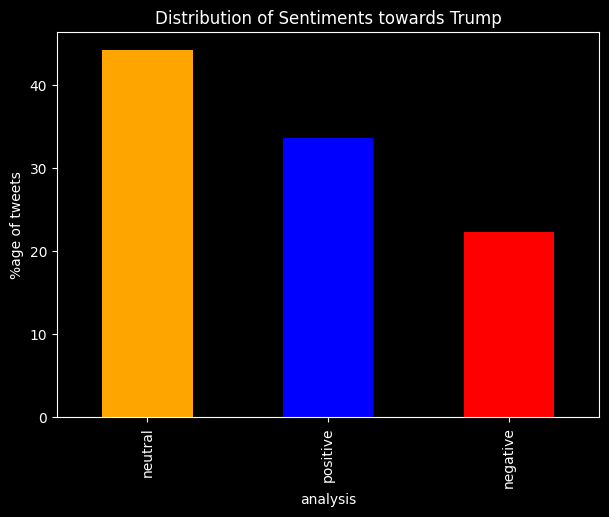

In [ ]:
# how much data is positive/negetive/neutral
plt.style.use('dark_background')  # Adding black theme

# Define colors for each bar
colors = ['orange', 'blue', 'red']

plt.figure(figsize=(7, 5))
(trump_tweets.analysis.value_counts(normalize=True) * 100).plot.bar(color=colors)

# Adding if statement to check if trump_tweets DataFrame is empty
if trump_tweets.empty:
    print("trump_tweets DataFrame is empty. Please check the previous cell for errors.")
else:
    # Continue with the analysis
    plt.ylabel("%age of tweets")
    plt.title("Distribution of Sentiments towards Trump")
    plt.show()

Now, plotting Word Cloud to quickly identify the most important themes or topics in the text and understand the overall sentiment or tone of the tweets.

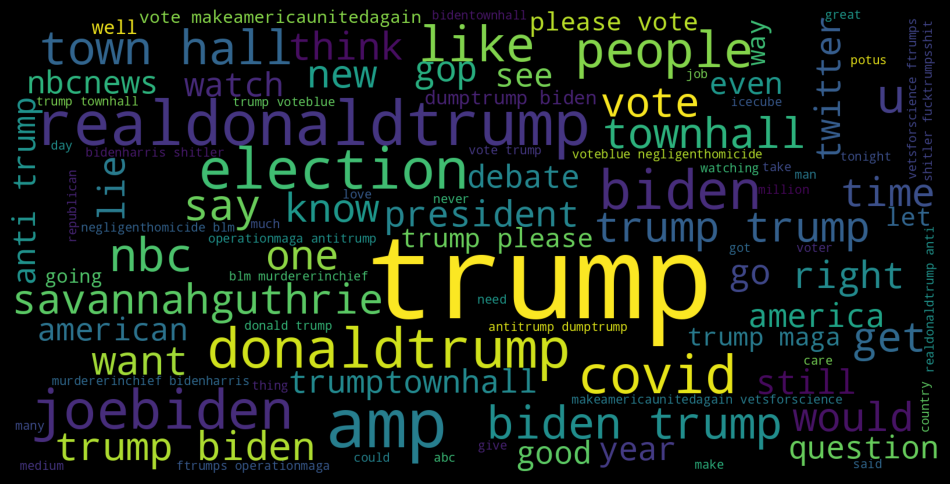

In [ ]:
def word_cloud(wd_list):
    # Import the stopwords module
    from nltk.corpus import stopwords

    # Create a new stopwords variable
    stopwords = set(stopwords.words('english'))

    all_words = ' '.join(wd_list)
    wordcloud = WordCloud(background_color='black',
                          stopwords=stopwords,
                          width=1600, height=800, max_words=100, max_font_size=200,
                          colormap="viridis").generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud)

word_cloud(trump_tweets['cleantext'][:5000])

#### **Joe Biden’s Twitter Sentiment Analysis**

In [ ]:
biden_tweets = data[data['candidate'] == 'biden']
biden_tweets = biden_tweets.loc[biden_tweets.country == 'United States of America']
biden_tweets = biden_tweets[['tweet']]
biden_tweets

,tweet
6,"In 2020, #NYPost is being #censorship #CENSORE..."
17,"Comments on this? ""Do Democrats Understand how..."
25,@RealJamesWoods #BidenCrimeFamily #JoeBiden #H...
29,Come on @ABC PLEASE DO THE RIGHT THING. Move t...
34,#realDonaldTrump addresses #JoeBiden and #Hunt...
...,...
776836,"#Biden 🗽🇺🇸👍🏽 | Images 📷 @ Santa Maria, CA. | ..."
776845,Will #criticalRaceTheory become ubiquitous in ...
776847,You moving near #Biden 🤔 https://t.co/1F6i1YIJ2P
776861,#election #2020Elections #trump #biden https:/...


Similarly, we apply all the functions for Joe Biden now.

In [ ]:
biden_tweets['cleantext']=biden_tweets['tweet'].apply(clean)
biden_tweets.head()

,tweet,cleantext
6,"In 2020, #NYPost is being #censorship #CENSORE...",nypost censorship censored twitter manipulate ...
17,"Comments on this? ""Do Democrats Understand how...",comment democrat understand ruthless china chi...
25,@RealJamesWoods #BidenCrimeFamily #JoeBiden #H...,realjameswoods bidencrimefamily joebiden hunte...
29,Come on @ABC PLEASE DO THE RIGHT THING. Move t...,come abc please right thing move biden town ha...
34,#realDonaldTrump addresses #JoeBiden and #Hunt...,realdonaldtrump address joebiden hunterbiden c...


Similarly, repeating the steps for Joe Biden analysis.

In [ ]:
biden_tweets['subjectivity'] = biden_tweets['cleantext'].apply(getsubjectivity)
biden_tweets['polarity'] = biden_tweets['cleantext'].apply(getpolarity)
biden_tweets['analysis'] = biden_tweets['polarity'].apply(getAnalysis)
biden_tweets.head()

,tweet,cleantext,subjectivity,polarity,analysis
6,"In 2020, #NYPost is being #censorship #CENSORE...",nypost censorship censored twitter manipulate ...,0.678571,-0.148810,negative
17,"Comments on this? ""Do Democrats Understand how...",comment democrat understand ruthless china chi...,1.000000,-1.000000,negative
25,@RealJamesWoods #BidenCrimeFamily #JoeBiden #H...,realjameswoods bidencrimefamily joebiden hunte...,0.000000,0.000000,neutral
29,Come on @ABC PLEASE DO THE RIGHT THING. Move t...,come abc please right thing move biden town ha...,0.178571,0.078571,positive
34,#realDonaldTrump addresses #JoeBiden and #Hunt...,realdonaldtrump address joebiden hunterbiden c...,0.000000,0.000000,neutral


Now, we find out the distribution of sentiments in the dataset to know which sentiment holds the most values and how it will affect the election results.

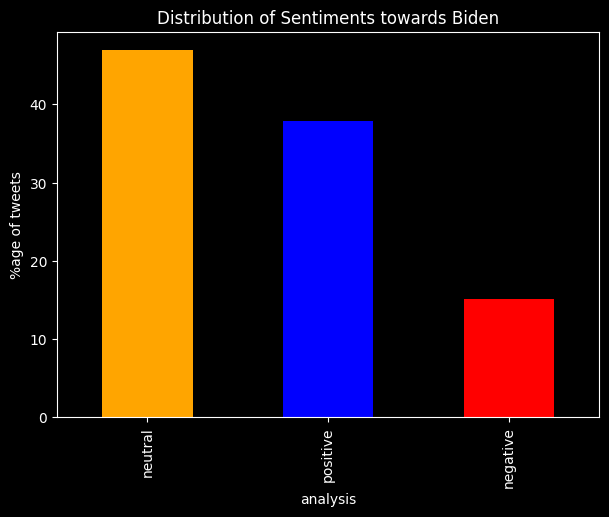

In [ ]:
# how much data is positive/negetive/neutral
plt.style.use('dark_background')

# Define colors for each bar
colors = ['orange', 'blue', 'red']

plt.figure(figsize=(7, 5))
(biden_tweets.analysis.value_counts(normalize=True) * 100).plot.bar(color=colors)
plt.ylabel("%age of tweets")
plt.title("Distribution of Sentiments towards Biden")
plt.show()

Now, plotting the Word Cloud for the Joe Biden dataset.

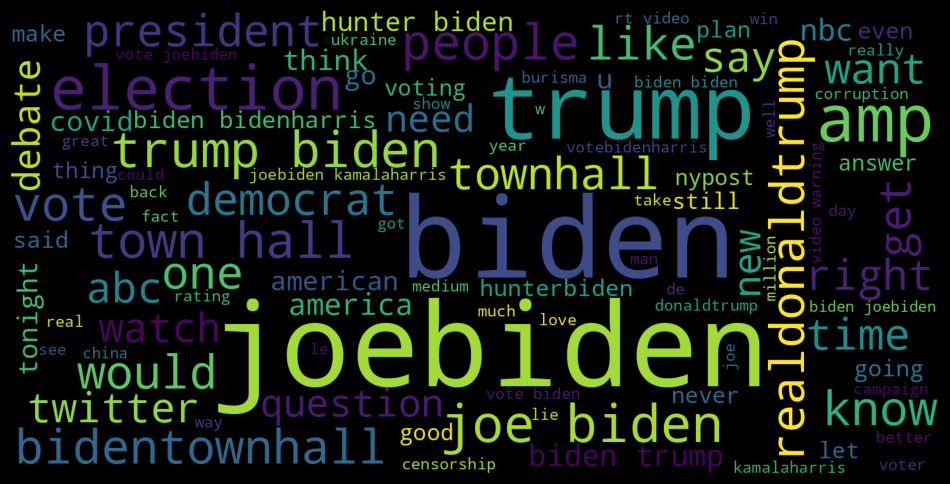

In [ ]:
word_cloud(biden_tweets['cleantext'][:5000])


Lets analyze the sentiments to predict the results for Donald Trump,

In [ ]:
trump_tweets.analysis.value_counts(normalize=True)*100

analysis
neutral     44.158680
positive    33.623812
negative    22.217507
Name: proportion, dtype: float64

Now, analyze tweets for Joe Biden.

In [ ]:
biden_tweets.analysis.value_counts(normalize=True)*100

analysis
neutral     46.951959
positive    37.930271
negative    15.117771
Name: proportion, dtype: float64

The sentiment analysis of tweets mentioning Trump and Biden reveals notable differences in public opinion as expressed on Twitter. For Trump, 44.16% of the tweets are neutral, 33.62% are positive, and 22.22% are negative. In contrast, tweets about Biden show 46.95% neutrality, 37.93% positivity, and 15.12% negativity. These results indicate that while both candidates receive a significant amount of neutral tweets, Biden has a slightly higher percentage of positive sentiment (37.93% compared to Trump's 33.62%) and a lower percentage of negative sentiment (15.12% compared to Trump's 22.22%). This suggests that Biden may be viewed more favorably and less critically on Twitter compared to Trump. Factors such as media portrayal, political events, and campaign strategies likely influence these sentiment trends, reflecting the complex dynamics of public opinion during the election period.

#### **How do subjectivity scores for each candidate vary across states and who was mentioned in more subjective tweets?**

To answer this question, I performed subjectivity analysis of tweets for both candidates using the 2020 Election dataset. In subjectivity analysis, we determine how emotion, speculation, opinion, and sentiment are expressed in natural language. While message polarity determines the positive or negative connotation of a text, subjectivity analysis tries to discern whether the text is subjective in the form of an opinion, belief, emotion, or speculation or objective as a fact.

I evaluate tweets from ten most popular states during the 2020 elections in terms of their subjectivity. I wanted to gauge which of the two candidates had a higher subjectivity in the tweets mentioning them.

In [ ]:
us_data = data[data['country'].isin(['United States of America'])]
us_data[:1]

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,candidate
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8436472.0,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,trump


In [ ]:
# Compute subjectivity scores for each tweet
us_data['subjectivity'] = us_data['tweet'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# List of 10 most populous states (in order for this example)
top_states = ['California', 'Texas', 'Florida', 'New York', 'Pennsylvania', 'Illinois', 'Ohio', 'Georgia', 'North Carolina', 'Michigan']

# Filter data to include only the top 10 most populous states
data10 = us_data[us_data['state'].isin(top_states)]

# Compute average subjectivity scores for Biden and Trump in each of the top 10 states
subjectivity_scores = data10.groupby(['state', 'candidate'])['subjectivity'].mean().reset_index()

# Pivot the table to get a better view
subjectivity_scores_pivot = subjectivity_scores.pivot(index='state', columns='candidate', values='subjectivity').reset_index()

# Display the title and table using tabulate
title = "Subjectivity Scores of Biden and Trump Across Ten Most Populous States of the US"
print(title)

# print(subjectivity_scores_pivot)
# Display the table using tabulate
print(tabulate(subjectivity_scores_pivot, headers='keys', tablefmt='pretty'))

Subjectivity Scores of Biden and Trump Across Ten Most Populous States of the US
+---+----------------+---------------------+---------------------+
|   |     state      |        biden        |        trump        |
+---+----------------+---------------------+---------------------+
| 0 |   California   | 0.31187728829608624 | 0.3190110518806422  |
| 1 |    Florida     | 0.2778815170928288  | 0.2778045859560884  |
| 2 |    Georgia     | 0.3020047985350537  | 0.31780725034258506 |
| 3 |    Illinois    | 0.31749442989474586 | 0.3331782851169816  |
| 4 |    Michigan    | 0.3119717065787037  |  0.379380524220374  |
| 5 |    New York    | 0.3143528344159509  | 0.3272775073791554  |
| 6 | North Carolina | 0.32129032282012443 |  0.324956064802977  |
| 7 |      Ohio      | 0.2364049124287335  | 0.3267651838830569  |
| 8 |  Pennsylvania  | 0.3135532222040984  | 0.3545177839778989  |
| 9 |     Texas      | 0.32635607004712425 | 0.3148241985701192  |
+---+----------------+---------------------+----

In [ ]:
# Melt the pivot table for plotting
subjectivity_scores_melted = subjectivity_scores_pivot.melt(id_vars='state', value_vars=['biden', 'trump'], var_name='candidate', value_name='subjectivity')

# Create the line graph using plotly
fig = px.line(subjectivity_scores_melted, x='state', y='subjectivity', color='candidate', markers=True,
              labels={'State': 'State', 'Subjectivity': 'Average Subjectivity', 'Candidate': 'Candidate'},
              title='Average Subjectivity Scores of Tweets by Biden and Trump Across 10 Most Populous States')

# Update the layout to improve readability
fig.update_layout(xaxis_title='State', yaxis_title='Average Subjectivity', legend_title='Candidate')

# Display the plot
fig.show()

We can observe that tweets mentioning Donald Trump have a higher subjectivity score for all 10 states compared with those mentioning Joe Biden. Texas where Biden scored high on tweets, Trump actually won in that state. Is interesting to see that in Michigan where Biden won Trump scored high on tweets. Not surprised that Trump won in Ohio where Biden scored low on tweets. Florida and North Carolina were neutral for both candidates where Trump won in both states.

In [ ]:
# Ensure candidate names are properly formatted
us_data['candidate'] = us_data['candidate'].str.strip().str.lower()

# Compute subjectivity scores for each tweet
us_data['subjectivity'] = us_data['tweet'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Compute overall average subjectivity for each candidate
average_subjectivity = subjectivity_scores_melted.groupby('candidate')['subjectivity'].mean().reset_index()

print(average_subjectivity)

# Create a dictionary to map candidates to colors
color_discrete_map = {'trump': 'red', 'biden': 'blue'}

# Create the bar chart
fig = px.bar(average_subjectivity, x='candidate', y='subjectivity', color='candidate',
             color_discrete_map=color_discrete_map,
             labels={'candidate': 'Candidate', 'subjectivity': 'Average Subjectivity'},
             title='Average Subjectivity Scores of Tweets by Candidate')

# Update the layout with a black theme
fig.update_layout(plot_bgcolor='black',
                  paper_bgcolor='black', font_color='white')

# Show the chart
fig.show()

  candidate  subjectivity
0     biden      0.303319
1     trump      0.327552


####**Subjectivity Analysis**

**To answer the first question:**

**How do subjectivity scores for each candidate vary across states and who was mentioned in more subjective tweets?**

The analysis of the subjectivity scores for tweets mentioning Joe Biden and Donald Trump across the 10 most populous states reveals notable variations in public sentiment. Subjectivity scores measure the degree to which the language used in the tweets is opinion-based, with higher scores indicating more subjective content. We can observe that tweets mentioning Donald Trump have a higher subjectivity score for all ten states compared with those mentioning Joe Biden. For Joe Biden, subjectivity scores range from a low of 0.236 in Ohio to a high of 0.326 in Texas, showing relatively consistent subjectivity levels with slight variations across different states. Donald Trump, on the other hand, shows a wider range of subjectivity scores, from 0.278 in Florida to 0.379 in Michigan. This indicates that tweets mentioning Trump are generally more subjective compared to those mentioning Biden, especially in states like Michigan, Pennsylvania, and Illinois, where the subjectivity scores are particularly high for Trump. Tweets mentioning Donald Trump were more subjective than those mentioning Biden. This phenomenon of high subjectivity of tweets mentioning Donald Trump was observed for all states of the US. Overall, tweets about Donald Trump tend to be more subjective across most states, with his subjectivity scores being higher than Biden's in seven out of the ten states analyzed. This shows overall subjectivity for both candidates across all states, suggesting that public discussions around Trump are more opinionated, possibly reflecting stronger emotional reactions or polarized views compared to those about Biden.









#### **Polarity Analysis**

#### **How does sentiment of Twitter messages base on state location correlate with the real-world sentiment of the public towards the two candidates?**

To answer this research question, I performed a polarity analysis of the Twitter dataset organized into US states using location attribute. Average sentiment for both candidates is calculated for each state.

I compared this state-wise sentiment with the actual election result to test the accuracy of Twitter sentiment analysis based on location.

The maps below show the polarity map of US for Donald Trump and Joe Biden. Dark color indicates higher polarity and hence more positive sentiment for the candidate.

Although I use tweets from all states to construct US sentiment maps for both candidates, for our two research questions, I utilized tweets from only the 10 most populous states of the US. These 10 states contain almost 54% of the US population and accounted for over 60% of all tweets in our dataset. With a large population and thus a large Twitter user base, I am able to consistently gather a sizeable number of daily tweets from each of these states for both candidates. This allowed me to better determine average sentiment values for users tweeting from these states, as a small number of tweets could result in error due to an atypical sample.

In [ ]:
def clean(text):
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', str(text))

    # Convert text to lowercase
    text = text.lower()

    # Replace anything other than alphabets a-z with a space
    text = re.sub('[^a-z]', ' ', text)

    # Split the text into single words
    text = text.split()

    # Initialize WordNetLemmatizer
    lm = WordNetLemmatizer()

    # Lemmatize words and remove stopwords
    text = [lm.lemmatize(word) for word in text if word not in set(
        stopwords.words('english'))]

    # Join the words back into a sentence
    text = ' '.join(word for word in text)

    return text

In [ ]:
def getpolarity(text):
    return TextBlob(text).sentiment.polarity

# Filter for Trump tweets and ensure states are present
trump_tweets_state = us_data[us_data['candidate'].str.lower() == 'trump']
# print(trump_tweets_state.head(1))

# Apply cleaning and polarity functions
trump_tweets_state['cleantext'] = trump_tweets_state['tweet'].apply(clean)
trump_tweets_state['polarity'] = trump_tweets_state['cleantext'].apply(getpolarity)

# print(trump_tweets_state.head(1))

# Group by state and calculate average polarity
trump_state_polarity = trump_tweets_state.groupby('state_code')['polarity'].mean().reset_index()

# print(trump_state_polarity.head(1))

# Filter for Biden tweets and ensure states are present
biden_tweets_state = us_data[us_data['candidate'].str.lower() == 'biden']
# print(biden_tweets_state.head(1))

# Apply cleaning and polarity functions
biden_tweets_state['cleantext'] = biden_tweets_state['tweet'].apply(clean)
biden_tweets_state['polarity'] = biden_tweets_state['cleantext'].apply(getpolarity)

# print(biden_tweets_state.head(1))

# Group by state and calculate average polarity
biden_state_polarity = biden_tweets_state.groupby('state_code')['polarity'].mean().reset_index()

# print(biden_state_polarity.head(1))

In [ ]:
# Plot the geographical map for Trump tweets
fig_trump = px.choropleth(trump_state_polarity,
                          locations='state_code',  # Use state_code instead of state
                          locationmode='USA-states',
                          color='polarity',
                          hover_name='state_code',  # Display state names on hover
                          hover_data={'state_code': True, 'polarity': ':.2f'},  # Customize hover data
                          color_continuous_scale='Reds',  # Red color scale
                          range_color=[-1, 1],  # Range for color scale (-1 to 1 for polarity)
                          labels={'polarity': 'Average Polarity'},
                          title='Average Sentiment of Tweets Mentioning Donald Trump by State')

# Update the map layout
fig_trump.update_geos(
    visible=False,  # Hide default country borders
    projection=dict(type='albers usa'),  # Set projection type to Albers USA
)

# Show the Trump map
fig_trump.show()

# Plot the geographical map for Biden tweets
fig_biden = px.choropleth(biden_state_polarity,
                          locations='state_code',  # Use state_code instead of state
                          locationmode='USA-states',
                          color='polarity',
                          hover_name='state_code',  # Display state names on hover
                          hover_data={'state_code': True, 'polarity': ':.2f'},  # Customize hover data
                          color_continuous_scale='Blues',  # Yellow-Green-Blue color scale
                          range_color=[-1, 1],  # Range for color scale (-1 to 1 for polarity)
                          labels={'polarity': 'Average Polarity'},
                          title='Average Sentiment of Tweets Mentioning Joe Biden by State')

# Update the map layout
fig_biden.update_geos(
    visible=False,  # Hide default country borders
    projection=dict(type='albers usa'),  # Set projection type to Albers USA
)

# Show the Biden map
fig_biden.show()

For polarity comparison of the two candidates, just like subjectivity analysis, we utilize data from the 10 most populous states of the US. Through this analysis, we intend to identify sentiment of each state towards these candidates on Twitter. We want to evaluate how this polarity score compares with actual election results. Out of 10 states, Donald Trump won 4, while Joe Biden won was victorious in 6.

##### **Polarity of Clinton and Trump in 10 most populous states of the US. Higher polarity score indicates more positive sentiment.**

In [ ]:
# Compute subjectivity scores for each tweet
us_data['polarity'] = us_data['tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)

# List of 10 most populous states (in order for this example)
top_states = ['California', 'Texas', 'Florida', 'New York', 'Pennsylvania', 'Illinois', 'Ohio', 'Georgia', 'North Carolina', 'Michigan']

# Filter data to include only the top 10 most populous states
data10 = us_data[us_data['state'].isin(top_states)]

# Compute average subjectivity scores for Biden and Trump in each of the top 10 states
polarity_scores = data10.groupby(['state', 'candidate'])['polarity'].mean().reset_index()

# Pivot the table to get a better view
polarity_scores_pivot = polarity_scores.pivot(index='state', columns='candidate', values='polarity').reset_index()

print(polarity_scores_pivot )

candidate           state     biden     trump
0              California  0.098678  0.047839
1                 Florida  0.093659  0.052605
2                 Georgia  0.103882  0.076817
3                Illinois  0.100469  0.050214
4                Michigan  0.090846  0.059453
5                New York  0.098900  0.050554
6          North Carolina  0.100946  0.064481
7                    Ohio  0.108878  0.047799
8            Pennsylvania  0.091134  0.030918
9                   Texas  0.083168  0.041336


In [ ]:
# Melt the pivot table for plotting
polarity_scores_melted = polarity_scores_pivot.melt(id_vars='state', value_vars=['biden', 'trump'], var_name='candidate', value_name='polarity')

# Create the linear graph using plotly
fig = px.line(polarity_scores_melted, x='state', y='polarity', color='candidate', markers=True,
              labels={'state': 'State', 'polarity': 'Average polarity', 'candidate': 'Candidate'},
              title='Average Polarity Scores of Tweets by Biden and Trump Across 10 Most Populous States')

# Update the layout to improve readability
fig.update_layout(xaxis_title='State', yaxis_title='Average Polarity', legend_title='Candidate')

We observe Joe Biden as having higher polarity than Donald Trump in all ten states. Joe Biden won in California, Georgia, Illinois, Michigan, New York, and Pennsylvania. Interesting enough out of the four states that Joe Biden did not win in the 2020 elections, Joe had higher polarity score then Donald Trump. Pennsylvania was a big drop for Trump where Biden won the 2020 Election. Below shows the polarity scores and error terms along with the eventual winner of these states in the elections.

In [ ]:
# # Compute polarity scores for each tweet
us_data['polarity'] = us_data['tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)

# List of 10 most populous states
top_states = ['California', 'Texas', 'Florida', 'New York', 'Pennsylvania', 'Illinois', 'Ohio', 'Georgia', 'North Carolina', 'Michigan']

# Filter data to include only the top 10 most populous states
data10 = us_data[us_data['state'].isin(top_states)]

# Compute average polarity scores and standard errors for Biden and Trump in each of the top 10 states
polarity_stats = data10.groupby(['state', 'candidate'])['polarity'].agg(['mean', 'std', 'count']).reset_index()
polarity_stats['standard_error'] = polarity_stats['std'] / np.sqrt(polarity_stats['count'])

# Pivot the table to get Biden and Trump polarity scores and errors in separate columns
polarity_pivot = polarity_stats.pivot(index='state', columns='candidate', values=['mean', 'standard_error']).reset_index()
polarity_pivot.columns = ['_'.join(col).strip() for col in polarity_pivot.columns.values]
polarity_pivot.rename(columns={'state_': 'state'}, inplace=True)

# Determine election winners by state
election_winners = ['Biden' if state in ['California', 'Georgia', 'Illinois', 'Michigan', 'New York', 'Pennsylvania']
                    else 'Trump' for state in polarity_pivot['state']]

# Create DataFrame with standard error rates and election winners
data = {
    'State': polarity_pivot['state'],
    'Biden Polarity': polarity_pivot['mean_biden'],
    'Trump Polarity': polarity_pivot['mean_trump'],
    'Error Rate Biden': polarity_pivot['standard_error_biden'],
    'Error Rate Trump': polarity_pivot['standard_error_trump'],
    'Election Winner': election_winners
}

df = pd.DataFrame(data)

# Format columns to six decimal places for polarity and standard error
df['Biden Polarity'] = df['Biden Polarity'].map('{:.6f}'.format)
df['Trump Polarity'] = df['Trump Polarity'].map('{:.6f}'.format)
df['Error Rate Biden'] = df['Error Rate Biden'].map('{:.6f}'.format)
df['Error Rate Trump'] = df['Error Rate Trump'].map('{:.6f}'.format)

# Reorder the columns
df = df[['State', 'Biden Polarity', 'Trump Polarity', 'Error Rate Biden', 'Error Rate Trump', 'Election Winner']]

# Display the title and table using tabulate
title = "Polarity Score and Standard Error of Tweets Mentioning Joe Biden and Donald Trump in 10 Most Populous States of the US"
print(title)

# Display the table using tabulate
print(tabulate(df, headers='keys', tablefmt='pretty'))

Polarity Score and Standard Error of Tweets Mentioning Joe Biden and Donald Trump in 10 Most Populous States of the US
+---+----------------+----------------+----------------+------------------+------------------+-----------------+
|   |     State      | Biden Polarity | Trump Polarity | Error Rate Biden | Error Rate Trump | Election Winner |
+---+----------------+----------------+----------------+------------------+------------------+-----------------+
| 0 |   California   |    0.098678    |    0.047839    |     0.002246     |     0.002020     |      Biden      |
| 1 |    Florida     |    0.093659    |    0.052605    |     0.003752     |     0.003192     |      Trump      |
| 2 |    Georgia     |    0.103882    |    0.076817    |     0.005613     |     0.005868     |      Biden      |
| 3 |    Illinois    |    0.100469    |    0.050214    |     0.004815     |     0.004072     |      Biden      |
| 4 |    Michigan    |    0.090846    |    0.059453    |     0.009539     |     0.008551  

Higher polarity indicates higher positive sentiment. Last column of the table shows eventual winner of the state in 2020 presidential elections.

Upon examining the calculation, it's evident that polarity scores have been computed for tweets mentioning Joe Biden and Donald Trump across the ten most populous states of the US. These scores reflect the sentiment associated with each candidate, with positive values indicating positive sentiment and negative values indicating negative sentiment. Additionally, standard error rates have been calculated to estimate the variability or uncertainty in these polarity scores. Lower standard error rates suggest higher confidence in the polarity score estimates. The results indicate that, on average, tweets mentioning Joe Biden tend to have slightly higher polarity scores compared to those mentioning Donald Trump in most states. However, the differences between the two candidates' polarity scores are relatively small. Furthermore, the error rates for both Biden and Trump are generally low, suggesting that the polarity score estimates are reasonably stable across the analyzed tweets. Finally, the table also identifies the election winner for each state based on the polarity scores, with Biden winning states where the polarity scores tend to be higher and Trump winning states where his scores are higher. Overall, the calculation provides valuable insights into the sentiment expressed in tweets regarding the two presidential candidates and offers a quantitative understanding of public opinion across different states.

**To answer the second question:**

**How does sentiment of Twitter messages base on state location correlate with the real-world sentiment of the public towards the two candidates?**

The sentiment of Twitter messages based on state location, as reflected in the calculated polarity scores, appears to exhibit some correlation with the real-world sentiment of the public towards the two candidates, Joe Biden and Donald Trump. The analysis suggests that in most of the populous states, tweets mentioning Joe Biden tend to have slightly higher polarity scores compared to those mentioning Donald Trump. This could indicate a trend where a larger proportion of Twitter users in these states express more positive sentiment towards Biden. However, it's essential to interpret these findings cautiously. While Twitter provides a platform for public expression, its user demographics may not be fully representative of the entire population. Real-world sentiment towards political candidates is influenced by various factors beyond Twitter, including personal experiences, media coverage, and campaign events. Therefore, while there may be some correlation between Twitter sentiment and real-world sentiment, it's crucial to consider a broader range of sources and factors when assessing public opinion towards political candidates.

### **Subjectivity and Polarity Analysis Value**

####**Which sentiment holds the most value and how it will affect the election results?**

**To answer the third question:**


Analyzing the sentiment of tweets mentioning Joe Biden and Donald Trump across the 10 most populous states provides valuable insights into public opinion and its potential impact on election results. Polarity scores measure the positivity or negativity of tweets, while subjectivity scores measure the degree of opinion versus fact-based language. From the data, it's evident that tweets mentioning Joe Biden generally have higher polarity scores, indicating a more positive sentiment, compared to those mentioning Donald Trump. However, tweets about Trump consistently exhibit higher subjectivity scores across all ten states, suggesting more emotionally charged and polarized discussions. This heightened subjectivity can energize Trump's base but may also lead to increased polarization, potentially affecting voter turnout and overall electoral outcomes.

We can observe that tweets mentioning Donald Trump have a higher subjectivity score for all ten states compared with those mentioning Joe Biden. Tweets mentioning Donald Trump were more subjective than those mentioning Biden. This phenomenon of high subjectivity of tweets mentioning Donald Trump was observed for all states of the US. This shows overall subjectivity for both candidates across all states.

The most valuable sentiment in this context depends on the broader electoral strategy and voter dynamics. If the goal is to galvanize a passionate voter base and ensure high turnout, the higher subjectivity seen in tweets about Donald Trump could be advantageous. However, if the aim is to attract moderate voters and reduce polarization, the lower subjectivity in tweets about Joe Biden could be more beneficial.

Ultimately, understanding and addressing the underlying reasons for these sentiments will be crucial for shaping successful campaign strategies and influencing the final outcome of the election. Balancing positive sentiment with effective mobilization of the base and appealing to moderate voters will be key for both candidates to maximize their electoral success.

###**Social Network Analysis**

In this analysis, I aim to explore the social network dynamics of Twitter users from New York who tweeted about the 2020 U.S. presidential elections. By constructing a social network graph with users as nodes and retweet interactions as edges, we can identify key users and understand their influence within the network. I will apply various centrality measures—degree, betweenness, closeness, and eigenvector centrality—to quantify each user's importance. This will allow us to pinpoint community leaders and influential users who play significant roles in spreading information and shaping opinions. The overall structure of the network will reveal communication patterns, showing whether it is highly interconnected or consists of isolated clusters. Through this analysis, I seek to uncover the key players and interaction patterns that drove the Twitter discourse around the 2020 election in New York.

In [ ]:
print(us_data.columns)

Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'continent', 'state', 'state_code',
       'collected_at', 'candidate', 'subjectivity', 'polarity'],
      dtype='object')


In [ ]:
# Create an empty directed graph
G = nx.DiGraph()

# Add nodes for each unique user ID
user_ids = us_data['user_id'].unique()
G.add_nodes_from(user_ids)

# Create a dictionary to store the total retweet count for each pair of users
retweet_counts = {}

# Calculate total retweet count between each pair of users
for index, row in us_data.iterrows():
    retweeter = row['user_id']
    retweet_count = row['retweet_count']

    # Increment retweet count for each pair of users
    if retweeter not in retweet_counts:
        retweet_counts[retweeter] = {}
    retweet_counts[retweeter]['total'] = retweet_counts[retweeter].get('total', 0) + retweet_count

    # Increment retweet count for each pair of users mentioned in the tweet
    mentioned_users = [mention.strip() for mention in row['tweet'].split() if mention.startswith('@')]
    for user in mentioned_users:
        if user not in retweet_counts[retweeter]:
            retweet_counts[retweeter][user] = 0
        retweet_counts[retweeter][user] += retweet_count

# Add edges with weights between users
for retweeter, mentions in retweet_counts.items():
    for mentioned_user, count in mentions.items():
        if mentioned_user != 'total':
            G.add_edge(retweeter, mentioned_user, weight=count)

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


Number of nodes: 68795
Number of edges: 76983


The graph represents a network with 68,795 nodes and 76,983 edges. Each node corresponds to an entity, such as a user in a social media context, and each edge signifies a relationship or interaction between two nodes, such as a friendship or followership. The substantial number of nodes and edges indicates a large and potentially complex network with numerous interconnections. This level of connectivity can provide rich insights into the structure and dynamics of the network, such as identifying key influencers, understanding community formations, and analyzing the flow of information. The dense interconnectivity also suggests that the network is robust, with multiple pathways for interactions, making it resilient to the removal of individual nodes or edges.

####**Filter New York State and Construct the Network with Mentions and Retweets**

In [ ]:
# List state
top_states = ['New York']

# Filter data to include only New York
us_data_top_states = us_data[us_data['state'].isin(top_states)]

# Create an empty directed graph
G = nx.DiGraph()

# Add nodes for each unique user ID
user_ids = us_data_top_states['user_id'].unique()
G.add_nodes_from(user_ids)

# Create a dictionary to store the total retweet count for each pair of users
retweet_counts = {}

# Calculate total retweet count between each pair of users
for index, row in us_data_top_states.iterrows():
    retweeter = row['user_id']
    retweet_count = row['retweet_count']

    # Increment retweet count for each pair of users
    if retweeter not in retweet_counts:
        retweet_counts[retweeter] = {}
    retweet_counts[retweeter]['total'] = retweet_counts[retweeter].get('total', 0) + retweet_count

    # Increment retweet count for each pair of users mentioned in the tweet
    mentioned_users = [mention.strip() for mention in row['tweet'].split() if mention.startswith('@')]
    for user in mentioned_users:
        if user not in retweet_counts[retweeter]:
            retweet_counts[retweeter][user] = 0
        retweet_counts[retweeter][user] += retweet_count

# Add edges with weights between users
for retweeter, mentions in retweet_counts.items():
    for mentioned_user, count in mentions.items():
        if mentioned_user != 'total':
            G.add_edge(retweeter, mentioned_user, weight=count)

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 15016
Number of edges: 15802


The code provided filters a dataset to include only tweets from users in New York, then constructs a directed graph representing the interactions between these users based on retweet activity. It starts by isolating the relevant data and creating a graph where each unique user ID from New York is a node. For each tweet, it tracks the retweets and any mentioned users, storing the cumulative retweet counts in a dictionary. If a user is mentioned in a tweet, an edge is created between the retweeter and the mentioned user, weighted by the retweet count. Finally, it prints the total number of nodes and edges in the graph, providing an overview of the network's structure with 15,016 nodes and 15,802 edges.

####**Perform Network Analysis**

In [ ]:
# Calculate Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Calculate Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Calculate Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

# Calculate Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

Degree centrality measures how many connections each node has in the network. It calculates the fraction of nodes each node is connected to, providing an indication of its influence or importance within the network. Nodes with higher degree centrality are those that are more connected to other nodes.

Betweenness centrality measures the extent to which a node lies on the shortest paths between other nodes in the network. Nodes with high betweenness centrality act as bridges between different parts of the network, facilitating the flow of information or resources between them.

Closeness centrality measures how close a node is to all other nodes in the network. It calculates the average shortest path length from a node to all other nodes, indicating how quickly information or influence can spread from that node to others in the network.

Eigenvector centrality measures the influence of a node in the network based not only on its direct connections but also on the connections of its neighbors. Nodes with high eigenvector centrality are those that are connected to other influential nodes, contributing to their own influence within the network.

In [ ]:
# Calculate the top 10 values of each centrality measure
top_10_degree = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)[:10]
top_10_betweenness = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)[:10]
top_10_closeness = sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)[:10]
top_10_eigenvector = sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)[:10]

# Create a list of headers
headers = ["Rank", "Degree Centrality", "Betweenness Centrality", "Closeness Centrality", "Eigenvector Centrality"]

# Create a list of data
data = []
for i in range(10):
    data.append([i + 1,
                 f"{top_10_degree[i][0]}: {top_10_degree[i][1]:.4f}",
                 f"{top_10_betweenness[i][0]}: {top_10_betweenness[i][1]:.4f}",
                 f"{top_10_closeness[i][0]}: {top_10_closeness[i][1]:.4f}",
                 f"{top_10_eigenvector[i][0]}: {top_10_eigenvector[i][1]:.4f}"])

# Display the table
print(tabulate(data, headers=headers, tablefmt='grid'))


+--------+-------------------------------+--------------------------------+--------------------------+--------------------------+
|   Rank | Degree Centrality             | Betweenness Centrality         | Closeness Centrality     | Eigenvector Centrality   |
+========+===============================+================================+==========================+==========================+
|      1 | @realDonaldTrump: 0.0579      | 19074612.0: 0.0000             | @realDonaldTrump: 0.0579 | @realDonaldTrump: 0.6899 |
+--------+-------------------------------+--------------------------------+--------------------------+--------------------------+
|      2 | @JoeBiden: 0.0490             | 453480269.0: 0.0000            | @JoeBiden: 0.0490        | @JoeBiden: 0.5837        |
+--------+-------------------------------+--------------------------------+--------------------------+--------------------------+
|      3 | 874258472.0: 0.0393           | 15182798.0: 0.0000             | @KamalaHarris:

The table presents the top 10 nodes ranked by four different centrality measures in a social network analysis. Degree centrality indicates the number of connections each node has, with @realDonaldTrump and @JoeBiden being the most connected nodes. Betweenness centrality identifies nodes that act as bridges between different parts of the network, yet none of the top 10 nodes have significant betweenness centrality. Closeness centrality measures how quickly information can spread from a node to others, where @realDonaldTrump and @JoeBiden also lead. Eigenvector centrality assesses the influence of nodes based on both their connections and the connections of their neighbors, with @realDonaldTrump and @JoeBiden again prominent. Overall, @realDonaldTrump and @JoeBiden emerge as the most central nodes across all measures, suggesting their significant influence within the network.

####**Network Visualization**

####**Which community leaders from the social network are the most important nodes in this network?**

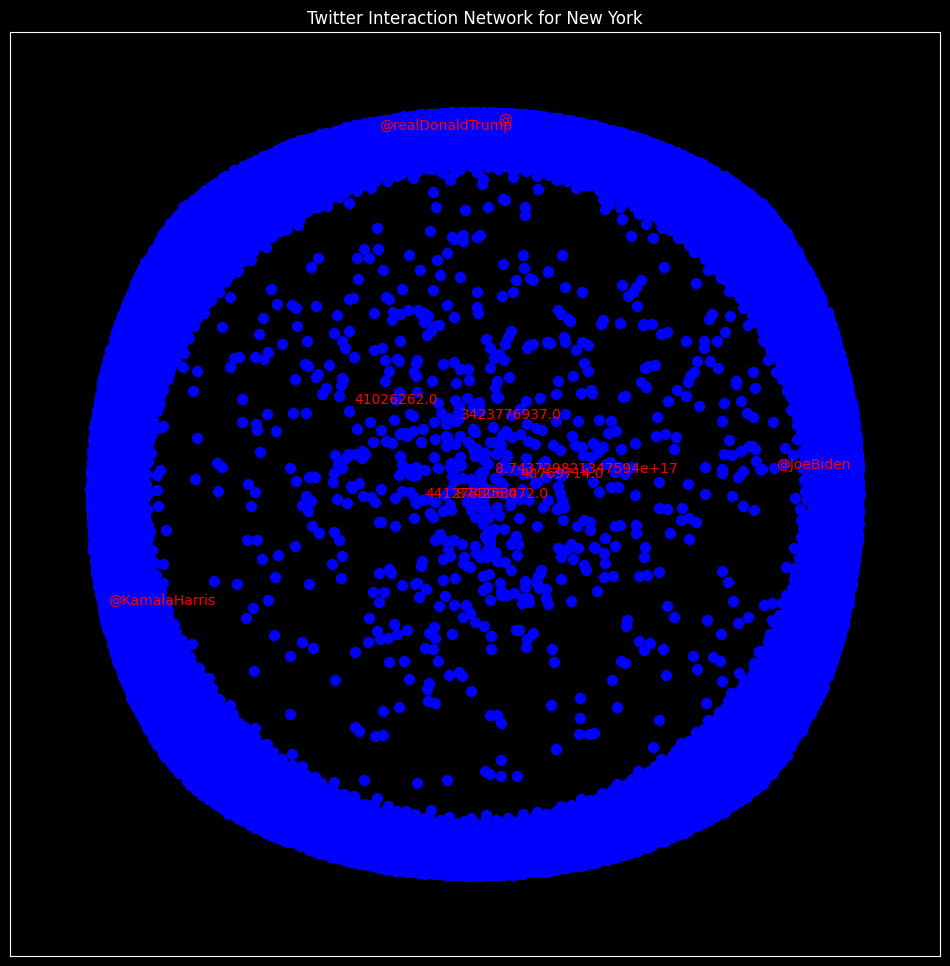

In [ ]:
# Draw the network
pos = nx.spring_layout(G, k=0.1)

plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_size=50, node_color='blue')
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, {user: user for user, _ in top_10_degree}, font_size=10, font_color='red')

plt.title("Twitter Interaction Network for New York")
plt.show()

The above visualization identifies the community leaders from the social network which are the most important nodes in this network since they appear to be the center of the network and link most of the retweets. Most of these nodes seem to be identified as Trump supporters, which makes them the most active community on Twitter and the most entities to have a high impact in promoting their candidate.

###**Conclusion**

Social media platforms like Facebook and Twitter have revolutionized how we interact, share news, and comment on global events. By June 2019, Twitter boasted over 348 million monthly active users, generating around 500 million tweets daily. This connectivity empowers users to initiate trends and highlight certain news, altering how events are reported. Electoral campaigns have increasingly harnessed Twitter, where politicians and parties maintain active presences. This surge in Twitter use for political campaigning has piqued researchers' interest, particularly in using Twitter data for election prediction based on public sentiment. My final project aimed to predict the 2020 US election results through sentiment analysis of tweets, leveraging the 2020 Election Tweets dataset from Kaggle, including tweets tagged with #DonaldTrump and #JoeBiden. The project analyzed tweet distribution by state, sentiment (negative, neutral, or positive) for each candidate, and overall sentiment, answering key questions about sentiment variation across states, correlation with real-world sentiment, and the impact on election outcomes. The study's findings, including higher subjectivity in tweets about Trump and a generally more positive sentiment towards Biden, suggest that while Trump's base is highly engaged and opinionated, Biden's support may be broader and more favorable. By employing various NLP techniques and visualization tools, the project provides insights into the role of Twitter sentiment in electoral outcomes and the dynamics of public opinion on social media. This approach underscores the importance of sentiment analysis in understanding political landscapes and predicting election results.









In [ ]:
# Group by state and calculate average polarity for Trump tweets
trump_state_polarity = trump_tweets_state.groupby('state_code')['polarity'].mean().reset_index()
print("Trump State Polarity:")
print(trump_state_polarity.head())

# Group by state and calculate average polarity for Biden tweets
biden_state_polarity = biden_tweets_state.groupby('state_code')['polarity'].mean().reset_index()
print("Biden State Polarity:")
print(biden_state_polarity.head())

Trump State Polarity:
  state_code  polarity
0         AK  0.010090
1         AL  0.056167
2         AR  0.039255
3         AZ  0.043111
4         CA  0.035739
Biden State Polarity:
  state_code  polarity
0         AK  0.099643
1         AL  0.091965
2         AR  0.144799
3         AZ  0.091830
4         CA  0.094982


###**Verification for Trump Tweets in South Dakota**

##### **Verification that there is no problem with the dataset because there are no tweets for Trump in South Dakota**

In [ ]:
# Filter for Trump tweets from South Dakota
trump_sd_tweets = us_data[(us_data['state'] == 'South Dakota') & (us_data['candidate'].str.lower() == 'trump')]

# Display the filtered tweets
print(trump_sd_tweets)

Empty DataFrame
Columns: [created_at, tweet_id, tweet, likes, retweet_count, source, user_id, user_name, user_screen_name, user_description, user_join_date, user_followers_count, user_location, lat, long, city, country, continent, state, state_code, collected_at, candidate, subjectivity, polarity]
Index: []

[0 rows x 24 columns]


In [ ]:
# Print unique values in the 'state' column
print("Unique values in 'state' column:", us_data['state'].unique())

# Print unique values in the 'candidate' column
print("Unique values in 'candidate' column:", us_data['candidate'].unique())

Unique values in 'state' column: ['Oregon' 'District of Columbia' 'Illinois' 'California' 'Florida'
 'Massachusetts' 'Pennsylvania' 'Texas' 'Michigan' 'Missouri' 'New York'
 'Colorado' 'Georgia' 'Ohio' 'Virginia' 'Arizona' 'North Carolina'
 'Tennessee' 'Nevada' 'Minnesota' 'Louisiana' 'Hawaii' 'Idaho'
 'Washington' 'Alabama' 'Kentucky' 'Iowa' 'New Jersey' 'Maryland'
 'New Mexico' 'Montana' 'Oklahoma' 'Alaska' 'Nebraska' 'Utah' 'Wisconsin'
 'Indiana' 'Connecticut' 'Vermont' 'Puerto Rico' 'South Carolina'
 'Arkansas' 'Kansas' 'Rhode Island' 'New Hampshire' 'West Virginia'
 'Maine' 'Wyoming' 'Mississippi' 'Delaware' 'North Dakota' 'South Dakota']
Unique values in 'candidate' column: ['trump' 'biden']


In [ ]:
# Ensure all values in the candidate column are lowercase for consistency
us_data['candidate'] = us_data['candidate'].str.lower()

# Filter for Trump tweets from South Dakota
trump_sd_tweets = us_data[(us_data['state'] == 'South Dakota') & (us_data['candidate'] == 'trump')]

# Display the filtered tweets
print(trump_sd_tweets)

Empty DataFrame
Columns: [created_at, tweet_id, tweet, likes, retweet_count, source, user_id, user_name, user_screen_name, user_description, user_join_date, user_followers_count, user_location, lat, long, city, country, continent, state, state_code, collected_at, candidate, subjectivity, polarity]
Index: []

[0 rows x 24 columns]


In [ ]:
# Check for leading/trailing spaces in the 'state' column
us_data['state'] = us_data['state'].str.strip()

# Ensure 'candidate' column values are in lowercase
us_data['candidate'] = us_data['candidate'].str.lower()

# Filter for Trump tweets from South Dakota
trump_sd_tweets = us_data[(us_data['state'] == 'South Dakota') & (us_data['candidate'] == 'trump')]

# Display the filtered tweets
print(trump_sd_tweets)

Empty DataFrame
Columns: [created_at, tweet_id, tweet, likes, retweet_count, source, user_id, user_name, user_screen_name, user_description, user_join_date, user_followers_count, user_location, lat, long, city, country, continent, state, state_code, collected_at, candidate, subjectivity, polarity]
Index: []

[0 rows x 24 columns]


In [ ]:
# Check for Trump tweets from nearby states or states with similar characteristics
nearby_states = ['North Dakota', 'Nebraska', 'Minnesota', 'Iowa', 'Montana', 'Wyoming']
trump_nearby_tweets = us_data[(us_data['state'].isin(nearby_states)) & (us_data['candidate'] == 'trump')]

# Display the filtered tweets
print(trump_nearby_tweets.head())

               created_at      tweet_id  \
337   2020-10-15 00:18:59  1.316534e+18   
1188  2020-10-15 01:13:43  1.316548e+18   
1392  2020-10-15 01:29:40  1.316552e+18   
1431  2020-10-15 01:32:52  1.316553e+18   
1443  2020-10-15 01:33:55  1.316553e+18   

                                                  tweet  likes  retweet_count  \
337   Sure is looking like the final days of the #Tr...    0.0            0.0   
1188  "Melania Trump says son Barron tested positive...    0.0            0.0   
1392  Mötley Crüe drummer #TommyLee plans to leave U...    0.0            0.0   
1431  Climate scientists are terrified of a 2nd #Tru...    0.0            2.0   
1443  #Trump and public health system have saved 2 m...    0.0            0.0   

                   source       user_id      user_name user_screen_name  \
337      Twitter for iPad  5.772112e+07     Tony Pirkl           tpirkl   
1188      Twitter Web App  9.135327e+17  J. Mac Jordan      J_MacJordan   
1392   Twitter for iPhone  3.

In [ ]:
# Filter for Trump tweets from all states
trump_tweets = us_data[us_data['candidate'] == 'trump']

# Display the first few rows of Trump tweets
print(trump_tweets.head())

# Display unique states for Trump tweets
unique_trump_states = trump_tweets['state'].unique()
print("Unique states for Trump tweets:", unique_trump_states)

             created_at      tweet_id  \
2   2020-10-15 00:00:02  1.316529e+18   
4   2020-10-15 00:00:08  1.316529e+18   
11  2020-10-15 00:00:25  1.316529e+18   
12  2020-10-15 00:00:26  1.316529e+18   
22  2020-10-15 00:01:14  1.316530e+18   

                                                tweet  likes  retweet_count  \
2   #Trump: As a student I used to hear for years,...    2.0            1.0   
4   You get a tie! And you get a tie! #Trump ‘s ra...    4.0            3.0   
11  In 2020, #NYPost is being #censorship #CENSORE...    0.0            0.0   
12  #Trump #PresidentTrump #Trump2020LandslideVict...    3.0            5.0   
22  #Trump: Nobody likes to tell you this, but som...    1.0            1.0   

                 source       user_id  \
2       Twitter Web App  8.436472e+06   
4    Twitter for iPhone  4.741380e+07   
11   Twitter for iPhone  1.994033e+07   
12  Twitter for Android  1.243315e+18   
22      Twitter Web App  8.436472e+06   

                               

In [ ]:
# Count the number of Trump tweets per state
trump_tweet_counts_per_state = trump_tweets['state'].value_counts()
print("Trump tweet counts per state:")
print(trump_tweet_counts_per_state)

Trump tweet counts per state:
state
New York                19340
California              18673
District of Columbia     9281
Texas                    7524
Florida                  6609
Illinois                 4455
Pennsylvania             3027
Georgia                  2211
Massachusetts            2186
Oregon                   1924
Washington               1819
Nevada                   1742
Colorado                 1606
Arizona                  1602
Ohio                     1576
North Carolina           1280
Tennessee                1269
Michigan                 1108
Missouri                 1059
Indiana                   805
Maryland                  803
Minnesota                 766
Louisiana                 680
Virginia                  640
Kentucky                  437
New Jersey                420
Wisconsin                 416
Hawaii                    393
Idaho                     315
Alabama                   293
Oklahoma                  283
South Carolina            281
Utah

In [ ]:
# Check the general structure and some random samples
print(us_data.info())
print(us_data.sample(10))

# Check if there are any anomalies with state codes or candidate entries
print("Unique state values:", us_data['state'].unique())
print("Unique candidate values:", us_data['candidate'].unique())

<class 'pandas.core.frame.DataFrame'>
Index: 182382 entries, 2 to 776865
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            182382 non-null  object 
 1   tweet_id              182382 non-null  float64
 2   tweet                 182382 non-null  object 
 3   likes                 182382 non-null  float64
 4   retweet_count         182382 non-null  float64
 5   source                182382 non-null  object 
 6   user_id               182382 non-null  float64
 7   user_name             182382 non-null  object 
 8   user_screen_name      182382 non-null  object 
 9   user_description      182382 non-null  object 
 10  user_join_date        182382 non-null  object 
 11  user_followers_count  182382 non-null  float64
 12  user_location         182382 non-null  object 
 13  lat                   182382 non-null  float64
 14  long                  182382 non-null  float64
 15  city 

In [ ]:
# Nearby states to South Dakota
nearby_states = ['North Dakota', 'Nebraska', 'Minnesota', 'Iowa', 'Montana', 'Wyoming']

# Filter Trump tweets from nearby states
trump_nearby_tweets = us_data[(us_data['state'].isin(nearby_states)) & (us_data['candidate'] == 'trump')]

# Display the filtered DataFrame
print(trump_nearby_tweets.head())

               created_at      tweet_id  \
337   2020-10-15 00:18:59  1.316534e+18   
1188  2020-10-15 01:13:43  1.316548e+18   
1392  2020-10-15 01:29:40  1.316552e+18   
1431  2020-10-15 01:32:52  1.316553e+18   
1443  2020-10-15 01:33:55  1.316553e+18   

                                                  tweet  likes  retweet_count  \
337   Sure is looking like the final days of the #Tr...    0.0            0.0   
1188  "Melania Trump says son Barron tested positive...    0.0            0.0   
1392  Mötley Crüe drummer #TommyLee plans to leave U...    0.0            0.0   
1431  Climate scientists are terrified of a 2nd #Tru...    0.0            2.0   
1443  #Trump and public health system have saved 2 m...    0.0            0.0   

                   source       user_id      user_name user_screen_name  \
337      Twitter for iPad  5.772112e+07     Tony Pirkl           tpirkl   
1188      Twitter Web App  9.135327e+17  J. Mac Jordan      J_MacJordan   
1392   Twitter for iPhone  3.

In [ ]:
# General inspection of Trump tweets
trump_tweets = us_data[us_data['candidate'] == 'trump']

# Display first few rows of Trump tweets
print(trump_tweets.head())

# Display unique states for Trump tweets
unique_trump_states = trump_tweets['state'].unique()
print("Unique states for Trump tweets:", unique_trump_states)

             created_at      tweet_id  \
2   2020-10-15 00:00:02  1.316529e+18   
4   2020-10-15 00:00:08  1.316529e+18   
11  2020-10-15 00:00:25  1.316529e+18   
12  2020-10-15 00:00:26  1.316529e+18   
22  2020-10-15 00:01:14  1.316530e+18   

                                                tweet  likes  retweet_count  \
2   #Trump: As a student I used to hear for years,...    2.0            1.0   
4   You get a tie! And you get a tie! #Trump ‘s ra...    4.0            3.0   
11  In 2020, #NYPost is being #censorship #CENSORE...    0.0            0.0   
12  #Trump #PresidentTrump #Trump2020LandslideVict...    3.0            5.0   
22  #Trump: Nobody likes to tell you this, but som...    1.0            1.0   

                 source       user_id  \
2       Twitter Web App  8.436472e+06   
4    Twitter for iPhone  4.741380e+07   
11   Twitter for iPhone  1.994033e+07   
12  Twitter for Android  1.243315e+18   
22      Twitter Web App  8.436472e+06   

                               

In [ ]:
# Check all unique states for Trump tweets, explicitly including South Dakota
all_states = us_data['state'].unique()
print("All unique states:", all_states)

# Ensure South Dakota is explicitly checked again
if 'South Dakota' not in all_states:
    print("No data from South Dakota.")
else:
    sd_trump_tweets = us_data[(us_data['state'] == 'South Dakota') & (us_data['candidate'] == 'trump')]
    print(sd_trump_tweets)

All unique states: ['Oregon' 'District of Columbia' 'Illinois' 'California' 'Florida'
 'Massachusetts' 'Pennsylvania' 'Texas' 'Michigan' 'Missouri' 'New York'
 'Colorado' 'Georgia' 'Ohio' 'Virginia' 'Arizona' 'North Carolina'
 'Tennessee' 'Nevada' 'Minnesota' 'Louisiana' 'Hawaii' 'Idaho'
 'Washington' 'Alabama' 'Kentucky' 'Iowa' 'New Jersey' 'Maryland'
 'New Mexico' 'Montana' 'Oklahoma' 'Alaska' 'Nebraska' 'Utah' 'Wisconsin'
 'Indiana' 'Connecticut' 'Vermont' 'Puerto Rico' 'South Carolina'
 'Arkansas' 'Kansas' 'Rhode Island' 'New Hampshire' 'West Virginia'
 'Maine' 'Wyoming' 'Mississippi' 'Delaware' 'North Dakota' 'South Dakota']
Empty DataFrame
Columns: [created_at, tweet_id, tweet, likes, retweet_count, source, user_id, user_name, user_screen_name, user_description, user_join_date, user_followers_count, user_location, lat, long, city, country, continent, state, state_code, collected_at, candidate, subjectivity, polarity]
Index: []

[0 rows x 24 columns]


**Data Confirmation Code**

Code snippets used to filter and confirm the findings:

In [ ]:
# Confirming unique states
all_states = us_data['state'].unique()
print("All unique states:", all_states)

# Filtering for South Dakota tweets
sd_trump_tweets = us_data[(us_data['state'] == 'South Dakota') & (us_data['candidate'] == 'trump')]
sd_biden_tweets = us_data[(us_data['state'] == 'South Dakota') & (us_data['candidate'] == 'biden')]

print("Trump tweets from South Dakota:")
print(sd_trump_tweets)  # Expected to be empty

print("Biden tweets from South Dakota:")
print(sd_biden_tweets)  # Shows the Biden tweets

All unique states: ['Oregon' 'District of Columbia' 'Illinois' 'California' 'Florida'
 'Massachusetts' 'Pennsylvania' 'Texas' 'Michigan' 'Missouri' 'New York'
 'Colorado' 'Georgia' 'Ohio' 'Virginia' 'Arizona' 'North Carolina'
 'Tennessee' 'Nevada' 'Minnesota' 'Louisiana' 'Hawaii' 'Idaho'
 'Washington' 'Alabama' 'Kentucky' 'Iowa' 'New Jersey' 'Maryland'
 'New Mexico' 'Montana' 'Oklahoma' 'Alaska' 'Nebraska' 'Utah' 'Wisconsin'
 'Indiana' 'Connecticut' 'Vermont' 'Puerto Rico' 'South Carolina'
 'Arkansas' 'Kansas' 'Rhode Island' 'New Hampshire' 'West Virginia'
 'Maine' 'Wyoming' 'Mississippi' 'Delaware' 'North Dakota' 'South Dakota']
Trump tweets from South Dakota:
Empty DataFrame
Columns: [created_at, tweet_id, tweet, likes, retweet_count, source, user_id, user_name, user_screen_name, user_description, user_join_date, user_followers_count, user_location, lat, long, city, country, continent, state, state_code, collected_at, candidate, subjectivity, polarity]
Index: []

[0 rows x 24 columns

While there are tweets from South Dakota, they only mention Joe Biden and not Trump. This discrepancy suggests that either:

There were no Trump tweets from South Dakota in the collected data.
There might be an issue or limitation in the data collection process related to Trump tweets from this state.

**Future Steps**

**Expand Data Collection**:

Ensure a comprehensive dataset that includes tweets from all regions for both candidates.

Check Data Sources: Verify if there are any biases or gaps in the data collection sources that could have led to the absence of Trump tweets from South Dakota.

By understanding these nuances, the dataset can be better refined and analyzed for more accurate political insights.

### **References**

https://www.archives.gov/electoral-college/2020